selective search 설치

> !pip install selectivesearch

In [1]:
!pip install selectivesearch

img shape :  (450, 375, 3)


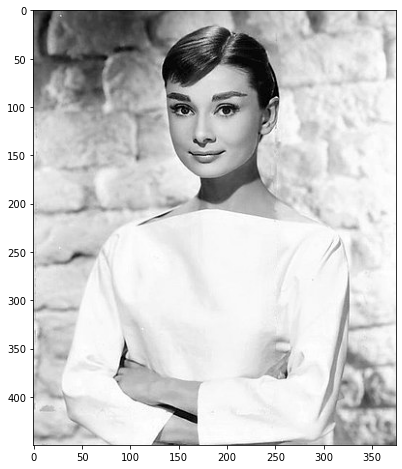

In [2]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

img = cv2.imread('image/audrey.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape : ', img.shape)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()

In [12]:
'''
selectivesearch.selective_search() :  이미지의 region proposal 정보를 반환
regions : selectivesearch에서 추천해주는 object가 있을만한 공간
min_size : 추천하는 image size의 최소크기

scale value가 크면, 큰 object 위주로 알고리즘 진행
scale value, min_size의 값이 크면 regions에서 추천해주는 양이 줄어듬
작은 object가 많으면 min_size을 낮춰야함
min_size에서 추천되는 bounding box 중에서 최소 500보다 큰 bounding box 추천
'''
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 500)

print(type(regions), len(regions))
# len(retions) -> 41 : selectivesearch 기반으로 찾아낸 object가 있을만한 공간의 수

<class 'list'> 119


##### 반환된 region proposal (g후보 영역)에 대한 정보 보기

반환된 region 변수는 리스트 타칩으로 세부 원소로 딕셔너리를 가지고 있음. 개별 딕셔너리내 key값별 의미

* rect 키값은 x, y 시작 좌표와 너비, 높이 값을 가지며 이 값이 detected object 후보를 나타내는 bounding box임.

* size는 object의 크기

* labels는 해당 rect로 지정된 bounding box내에 있는 object들의 고유 ID

* 아래로 내려갈수록 너비와 높이 값이 큰 bounding box이며 하나의 bounding box에 여러개의 object가 있을 확률이 커짐.

* labels가 두 개 이상 동시에 출력되는 경우 : 유사한  label끼리 합쳐짐

In [15]:
regions

# 출력결과
# {'rect': (0, 0, 49, 97), 'size': 1741, 'labels': [0.0]} ...
# (0, 0, 49, 97) : 좌상단 x좌표, 좌상단 y좌표, width value, height
# [0.0] : label의 고유ID

[{'rect': (0, 0, 49, 97), 'size': 1741, 'labels': [0.0]},
 {'rect': (15, 0, 43, 48), 'size': 1619, 'labels': [1.0]},
 {'rect': (39, 0, 105, 82), 'size': 3341, 'labels': [2.0]},
 {'rect': (121, 0, 97, 47), 'size': 2120, 'labels': [3.0]},
 {'rect': (205, 0, 87, 89), 'size': 1526, 'labels': [4.0]},
 {'rect': (220, 0, 154, 133), 'size': 11384, 'labels': [5.0]},
 {'rect': (273, 0, 52, 32), 'size': 1018, 'labels': [6.0]},
 {'rect': (335, 0, 39, 21), 'size': 726, 'labels': [7.0]},
 {'rect': (78, 11, 59, 99), 'size': 3811, 'labels': [8.0]},
 {'rect': (360, 14, 14, 57), 'size': 668, 'labels': [9.0]},
 {'rect': (134, 17, 58, 62), 'size': 1630, 'labels': [10.0]},
 {'rect': (143, 18, 64, 60), 'size': 1083, 'labels': [11.0]},
 {'rect': (191, 23, 61, 79), 'size': 2258, 'labels': [12.0]},
 {'rect': (19, 40, 58, 60), 'size': 1605, 'labels': [13.0]},
 {'rect': (136, 53, 88, 72), 'size': 2119, 'labels': [14.0]},
 {'rect': (15, 58, 38, 48), 'size': 1078, 'labels': [15.0]},
 {'rect': (166, 60, 87, 111), '

In [16]:
# rect정보만 출력해서 확인
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 49, 97), (15, 0, 43, 48), (39, 0, 105, 82), (121, 0, 97, 47), (205, 0, 87, 89), (220, 0, 154, 133), (273, 0, 52, 32), (335, 0, 39, 21), (78, 11, 59, 99), (360, 14, 14, 57), (134, 17, 58, 62), (143, 18, 64, 60), (191, 23, 61, 79), (19, 40, 58, 60), (136, 53, 88, 72), (15, 58, 38, 48), (166, 60, 87, 111), (0, 75, 107, 92), (232, 79, 117, 147), (148, 90, 56, 50), (50, 91, 133, 123), (139, 92, 57, 82), (305, 97, 69, 223), (86, 101, 46, 54), (170, 142, 64, 57), (4, 161, 66, 45), (0, 162, 47, 45), (173, 171, 95, 43), (33, 181, 43, 33), (261, 181, 63, 46), (72, 192, 88, 50), (83, 199, 240, 188), (0, 202, 118, 64), (106, 210, 89, 101), (302, 228, 66, 96), (74, 234, 49, 135), (35, 253, 54, 119), (67, 254, 16, 70), (0, 263, 55, 48), (248, 270, 78, 174), (245, 275, 59, 118), (0, 305, 47, 28), (104, 312, 80, 71), (317, 312, 57, 68), (0, 314, 44, 64), (208, 321, 42, 57), (35, 327, 57, 60), (326, 327, 48, 38), (218, 339, 46, 42), (84, 360, 91, 67), (0, 361, 46, 83), (8, 361, 26, 42), (30, 36

##### Bounding Box 시각화

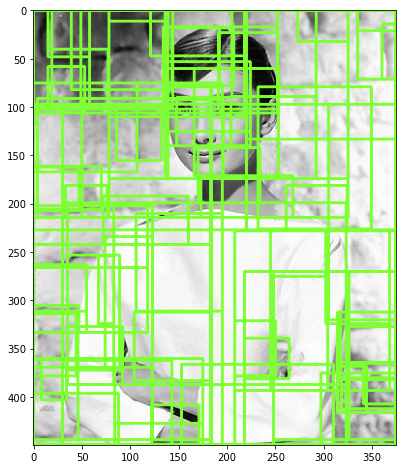

In [17]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box의 색깔, 두께 등을 인자로 입력하면 원본 이미지에 box를 그려줌
green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb_copy)
plt.show()

##### Bounding Box의 크기가 큰 후보만 추출

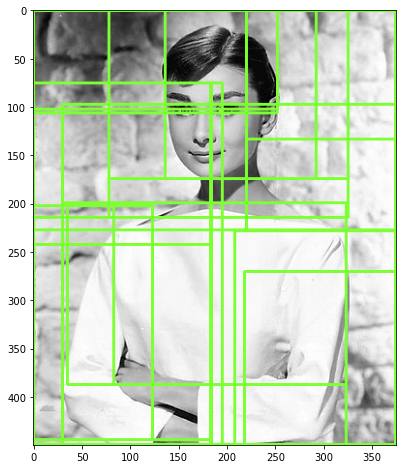

In [19]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000] # bounding box의 size가 10000 이상인 값들을 cand_rects에 저장

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb_copy)
plt.show()

##### IOU 구하기

IOU = Area of Overlap / Area of union

입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [20]:
import numpy as np

def compute_iou(cand_box, gt_box):

    # calculate intersection areas
    # cand_box : 예측한 bounding box (selective search에서 추천해준 box), gt_box : ground truth bounding box
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.maximum(cand_box[2], gt_box[2])
    y2 = np.maximum(cand_box[3], gt_box[3])

    intersection = np.maximum(x2 -x1, 0) * np.maximum(y2 -y1, 0)

    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection

    iou = intersection / union
    return iou

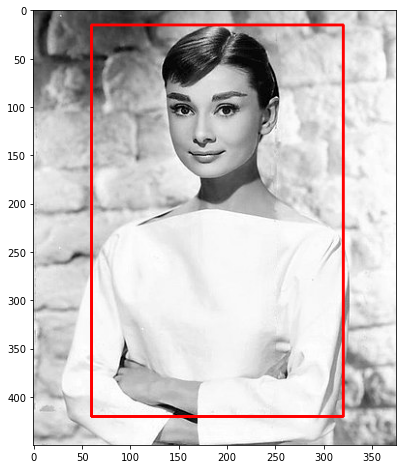

In [21]:
import cv2
import matplotlib.pyplot as plt

# 실제 box(ground truth)의 좌표를 아래와 같다고 가정
gt_box = [60, 15, 320, 420]

img = cv2.imread('image/audrey.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()

In [22]:
import selectivesearch

img = cv2.imread('image/audrey.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb2, scale = 100, min_size = 500)

print(type(regions), len(regions))

<class 'list'> 119


In [23]:
# 추천해준 object
[cand['rect'] for cand in regions]

[(0, 0, 49, 97),
 (15, 0, 43, 48),
 (39, 0, 105, 82),
 (121, 0, 97, 47),
 (205, 0, 87, 89),
 (220, 0, 154, 133),
 (273, 0, 52, 32),
 (335, 0, 39, 21),
 (78, 11, 59, 99),
 (360, 14, 14, 57),
 (134, 17, 58, 62),
 (143, 18, 64, 60),
 (191, 23, 61, 79),
 (19, 40, 58, 60),
 (136, 53, 88, 72),
 (15, 58, 38, 48),
 (166, 60, 87, 111),
 (0, 75, 107, 92),
 (232, 79, 117, 147),
 (148, 90, 56, 50),
 (50, 91, 133, 123),
 (139, 92, 57, 82),
 (305, 97, 69, 223),
 (86, 101, 46, 54),
 (170, 142, 64, 57),
 (4, 161, 66, 45),
 (0, 162, 47, 45),
 (173, 171, 95, 43),
 (33, 181, 43, 33),
 (261, 181, 63, 46),
 (72, 192, 88, 50),
 (83, 199, 240, 188),
 (0, 202, 118, 64),
 (106, 210, 89, 101),
 (302, 228, 66, 96),
 (74, 234, 49, 135),
 (35, 253, 54, 119),
 (67, 254, 16, 70),
 (0, 263, 55, 48),
 (248, 270, 78, 174),
 (245, 275, 59, 118),
 (0, 305, 47, 28),
 (104, 312, 80, 71),
 (317, 312, 57, 68),
 (0, 314, 44, 64),
 (208, 321, 42, 57),
 (35, 327, 57, 60),
 (326, 327, 48, 38),
 (218, 339, 46, 42),
 (84, 360, 91,

In [25]:
cand_rects = [cand['rect'] for cand in regions]

for index, cand_box  in enumerate(cand_rects):
    cand_box = list(cand_box) # tuple 형태를 list 형태로 변경

    # (x_min, y_min, w, h) -> (x_min, y_min, w + x_min, h + y_min) -> (x_min, y_min, x_max, y-max)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]


iou = compute_iou(cand_box, gt_box)
print('index: ', index, "iou: ", iou)

index:  118 iou:  0.9950784958013874


In [27]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]
cand_rects.sort()
cand_rects

[(0, 0, 252, 102),
 (0, 0, 252, 106),
 (0, 0, 325, 214),
 (0, 0, 325, 214),
 (0, 0, 374, 227),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 75, 183, 139),
 (0, 75, 183, 167),
 (0, 75, 183, 369),
 (0, 75, 183, 374),
 (0, 75, 183, 374),
 (0, 75, 183, 374),
 (0, 75, 184, 374),
 (0, 75, 184, 374),
 (0, 75, 184, 374),
 (0, 75, 195, 374),
 (0, 202, 123, 242),
 (30, 97, 344, 352),
 (30, 97, 344, 352),
 (30, 199, 293, 250),
 (30, 199, 293, 250),
 (35, 199, 288, 188),
 (78, 0, 214, 174),
 (78, 0, 247, 174),
 (78, 0, 247, 214),
 (78, 0, 247, 214),
 (83, 199, 240, 188),
 (136, 0, 156, 174),
 (208, 228, 166, 221),
 (218, 270, 156, 179),
 (220, 0, 154, 133),
 (220, 0, 154, 227),
 (220, 0, 154, 227)]

img shape:  (450, 375, 3)
index: 0 iou: 5.044776119402985 rectangle" (39, 82, 144, 82)
index: 1 iou: 0.7233478445877385 rectangle" (220, 133, 374, 133)
index: 2 iou: 2.531807903884445 rectangle" (78, 110, 137, 99)
index: 3 iou: 0.6211487996889883 rectangle" (166, 171, 253, 111)
index: 4 iou: 2.0885854897602796 rectangle" (0, 167, 107, 92)
index: 6 iou: 1.3512627090849458 rectangle" (50, 214, 183, 123)
index: 9 iou: 0.9665894167632291 rectangle" (0, 266, 118, 64)
index: 14 iou: 1.3398269378879173 rectangle" (134, 102, 252, 85)
index: 16 iou: 0.8255645789298031 rectangle" (139, 174, 253, 114)
index: 18 iou: 0.7326488300918156 rectangle" (139, 174, 292, 174)
index: 19 iou: 1.0489453538561773 rectangle" (136, 140, 224, 87)
index: 24 iou: 2.477542932628798 rectangle" (78, 110, 218, 110)
index: 25 iou: 1.3398269378879173 rectangle" (134, 102, 252, 85)
index: 27 iou: 3.764705882352941 rectangle" (19, 100, 144, 100)
index: 28 iou: 3.9390243902439024 rectangle" (0, 97, 58, 97)
index: 29 iou: 0.

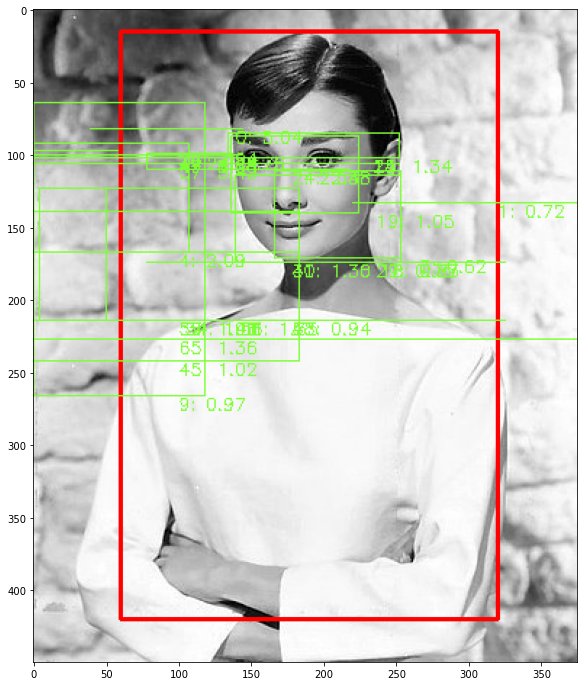

In [30]:
img = cv2.imread('image/audrey.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [60, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

for index, cand_box in enumerate(cand_rects):

    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[1] += cand_box[3]
    
    iou = compute_iou(cand_box, gt_box)

    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle"', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2],  cand_box[3]), color = green_rgb, thickness = 1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0] + 100, cand_box[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color = green_rgb, thickness = 1)

plt.figure(figsize = (12, 12))
plt.imshow(img_rgb)
plt.show()